# 1. *Supervised*:Improve the Basic Classifier (25 points)

Improve the supervised text classifier by *hyper-parameter tuning*, using different *tokenization*, and adding *features*.

## 1.0. Load Modules

In [1]:
from speech import *
from classify import evaluate

## 1.1. Default Logistic Regression

lbfgs performs the best when dataset is small.
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406


In [19]:
print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname)
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 7916)
Training classifier
Evaluating
  Accuracy 0.6537757437070938
  Accuracy 0.39855072463768115
Training classifier
Evaluating
  Accuracy 0.8137299771167048
  Accuracy 0.41304347826086957
Training classifier
Evaluating
  Accuracy 0.8993135011441648
  Accuracy 0.4033816425120773
Training classifier
Evaluating
  Accuracy 0.9491990846681923
  Accuracy 0.40096618357487923
Training classifier
Evaluating
  Accuracy 0.9695652173913043
  Accuracy 0.40096618357487923
Training classifier
Evaluating
  Accuracy 0.9791762013729977
  Accuracy 0.4082125603864734
Training classifier
Evaluating
  Accuracy 0.9837528604118994
  Accuracy 0.4178743961352657
Training classifier
Evaluating
  Accuracy 0.9881006864988559
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.9903890160183066
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.9926773455377574
  A

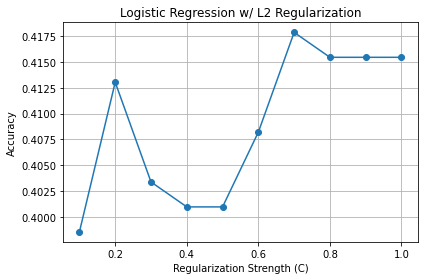

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.set_title('Logistic Regression w/ L2 Regularization')
ax.set_xlabel('Regularization Strength (C)')
ax.set_ylabel('Accuracy')
ax.grid()

ax.plot(Cs, dev_accs, marker='o')

plt.show()

## 1.1. + Bigrams

In [5]:
print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, ngram_range=(1,2))
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 58095)
Training classifier
Evaluating
  Accuracy 0.9695652173913043
  Accuracy 0.3743961352657005
Training classifier
Evaluating
  Accuracy 0.9974828375286041
  Accuracy 0.38405797101449274
Training classifier
Evaluating
  Accuracy 0.9979405034324943
  Accuracy 0.3888888888888889
Training classifier
Evaluating
  Accuracy 0.9981693363844394
  Accuracy 0.391304347826087
Training classifier
Evaluating
  Accuracy 0.9986270022883296
  Accuracy 0.3864734299516908
Training classifier
Evaluating
  Accuracy 0.9988558352402745
  Accuracy 0.3864734299516908
Training classifier
Evaluating
  Accuracy 0.9993135011441647
  Accuracy 0.391304347826087
Training classifier
Evaluating
  Accuracy 0.9995423340961098
  Accuracy 0.391304347826087
Training classifier
Evaluating
  Accuracy 0.9995423340961098
  Accuracy 0.391304347826087
Training classifier
Evaluating
  Accuracy 0.9995423340961098
  Accuracy 

## 1.2. + Bigrams with `max_features=10000`

In [6]:
print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, max_features=10000, ngram_range=(1,2))
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 10000)
Training classifier
Evaluating
  Accuracy 0.8139588100686499
  Accuracy 0.3743961352657005
Training classifier
Evaluating
  Accuracy 0.9567505720823799
  Accuracy 0.3719806763285024
Training classifier
Evaluating
  Accuracy 0.9897025171624714
  Accuracy 0.38164251207729466
Training classifier
Evaluating
  Accuracy 0.9967963386727688
  Accuracy 0.3888888888888889
Training classifier
Evaluating
  Accuracy 0.9979405034324943
  Accuracy 0.391304347826087
Training classifier
Evaluating
  Accuracy 0.9983981693363845
  Accuracy 0.39371980676328505
Training classifier
Evaluating
  Accuracy 0.9986270022883296
  Accuracy 0.39371980676328505
Training classifier
Evaluating
  Accuracy 0.9986270022883296
  Accuracy 0.3961352657004831
Training classifier
Evaluating
  Accuracy 0.9988558352402745
  Accuracy 0.3961352657004831
Training classifier
Evaluating
  Accuracy 0.9990846681922196
  Accu

## 1.2. TF-IDF Weighting

In [26]:
print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, max_features=10000, ngram_range=(1,2))
print(speech.trainX.shape)


from sklearn.feature_extraction.text import TfidfTransformer

print("Transforming TF-IDF")
transformer = TfidfTransformer()
tfidfX = transformer.fit_transform(speech.trainX)
tfidf_devX = transformer.fit_transform(speech.devX)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(tfidfX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(tfidfX, speech.trainy, cls))
    dev_accs.append(evaluate(tfidf_devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 10000)
Transforming TF-IDF
Training classifier
Evaluating
  Accuracy 0.30663615560640733
  Accuracy 0.2632850241545894
Training classifier
Evaluating
  Accuracy 0.3491990846681922
  Accuracy 0.26570048309178745
Training classifier
Evaluating
  Accuracy 0.3887871853546911
  Accuracy 0.2922705314009662
Training classifier
Evaluating
  Accuracy 0.41327231121281466
  Accuracy 0.30434782608695654
Training classifier
Evaluating
  Accuracy 0.43958810068649884
  Accuracy 0.3164251207729469
Training classifier
Evaluating
  Accuracy 0.46727688787185356
  Accuracy 0.321256038647343
Training classifier
Evaluating
  Accuracy 0.49450800915331805
  Accuracy 0.3309178743961353
Training classifier
Evaluating
  Accuracy 0.5212814645308924
  Accuracy 0.33816425120772947
Training classifier
Evaluating
  Accuracy 0.5423340961098398
  Accuracy 0.34299516908212563
Training classifier
Evaluating
  Accuracy

## 1.3. Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer

class Lemmatizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, sentence):
        return ' '.join([self.wnl.lemmatize(word) for word in sentence.split()])

print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, preprocessor=Lemmatizer())
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 8414)
Training classifier
Evaluating
  Accuracy 0.6670480549199085
  Accuracy 0.37922705314009664
Training classifier
Evaluating
  Accuracy 0.8327231121281464
  Accuracy 0.39371980676328505
Training classifier
Evaluating
  Accuracy 0.908695652173913
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.9521739130434783
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.9704805491990847
  Accuracy 0.41304347826086957
Training classifier
Evaluating
  Accuracy 0.9814645308924486
  Accuracy 0.4106280193236715
Training classifier
Evaluating
  Accuracy 0.9869565217391304
  Accuracy 0.41304347826086957
Training classifier
Evaluating
  Accuracy 0.9906178489702517
  Accuracy 0.41304347826086957
Training classifier
Evaluating
  Accuracy 0.9926773455377574
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.994508009153318
  A

## 1.4. NLTK Tokenizer

In [9]:
from nltk import word_tokenize          

print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, tokenizer=word_tokenize)
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=10000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 8563)
Training classifier
Evaluating
  Accuracy 0.688558352402746
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.8366132723112129
  Accuracy 0.4251207729468599
Training classifier
Evaluating
  Accuracy 0.9151029748283753
  Accuracy 0.427536231884058
Training classifier
Evaluating
  Accuracy 0.9551487414187643
  Accuracy 0.427536231884058
Training classifier
Evaluating
  Accuracy 0.9720823798627002
  Accuracy 0.4396135265700483
Training classifier
Evaluating
  Accuracy 0.9810068649885584
  Accuracy 0.4396135265700483
Training classifier
Evaluating
  Accuracy 0.9869565217391304
  Accuracy 0.43719806763285024
Training classifier
Evaluating
  Accuracy 0.9906178489702517
  Accuracy 0.43478260869565216
Training classifier
Evaluating
  Accuracy 0.9926773455377574
  Accuracy 0.4420289855072464
Training classifier
Evaluating
  Accuracy 0.9940503432494279
  Accurac

## 1.6. Wordnet Lemmatizer -> NLTK Tokenizer

In [21]:
from nltk import word_tokenize

print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, preprocessor=Lemmatizer(), tokenizer=word_tokenize)
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 9036)
Training classifier
Evaluating
  Accuracy 0.6974828375286041
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.8489702517162472
  Accuracy 0.4323671497584541
Training classifier
Evaluating
  Accuracy 0.9256292906178489
  Accuracy 0.4323671497584541
Training classifier
Evaluating
  Accuracy 0.9610983981693364
  Accuracy 0.4492753623188406
Training classifier
Evaluating
  Accuracy 0.9768878718535469
  Accuracy 0.45169082125603865
Training classifier
Evaluating
  Accuracy 0.9832951945080092
  Accuracy 0.4492753623188406
Training classifier
Evaluating
  Accuracy 0.988558352402746
  Accuracy 0.4492753623188406
Training classifier
Evaluating
  Accuracy 0.9929061784897025
  Accuracy 0.4420289855072464
Training classifier
Evaluating
  Accuracy 0.9954233409610984
  Accuracy 0.4420289855072464
Training classifier
Evaluating
  Accuracy 0.9961098398169337
  Accura

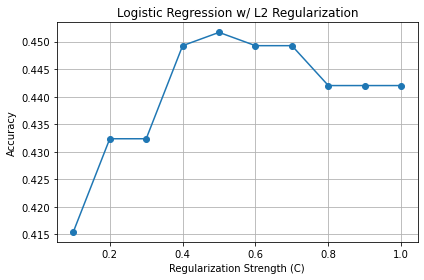

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.set_title('Logistic Regression w/ L2 Regularization')
ax.set_xlabel('Regularization Strength (C)')
ax.set_ylabel('Accuracy')
ax.grid()

ax.plot(Cs, dev_accs, marker='o')

plt.show()

In [24]:
print("Reading unlabeled data")
unlabeled = read_unlabeled(tarfname, speech)

cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=.5)
cls.fit(speech.trainX, speech.trainy)

print("Evaluating")
evaluate(speech.devX, speech.devy, cls)

print("Writing pred file")
write_pred_kaggle_file(unlabeled, cls, "data/speech-pred_sup.csv", speech)

Reading unlabeled data
(43342, 9036)
Evaluating
  Accuracy 0.45169082125603865
Writing pred file


## 1.7. NLTK Tokenizer -> Wordnet Lemmatizer

In [11]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, tokenizer=LemmaTokenizer())
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 7689)
Training classifier
Evaluating
  Accuracy 0.6816933638443936
  Accuracy 0.41545893719806765
Training classifier
Evaluating
  Accuracy 0.825858123569794
  Accuracy 0.4396135265700483
Training classifier
Evaluating
  Accuracy 0.9034324942791762
  Accuracy 0.4444444444444444
Training classifier
Evaluating
  Accuracy 0.9427917620137299
  Accuracy 0.427536231884058
Training classifier
Evaluating
  Accuracy 0.9645308924485125
  Accuracy 0.42995169082125606
Training classifier
Evaluating
  Accuracy 0.9768878718535469
  Accuracy 0.43478260869565216
Training classifier
Evaluating
  Accuracy 0.9837528604118994
  Accuracy 0.43478260869565216
Training classifier
Evaluating
  Accuracy 0.9881006864988559
  Accuracy 0.43478260869565216
Training classifier
Evaluating
  Accuracy 0.991533180778032
  Accuracy 0.43478260869565216
Training classifier
Evaluating
  Accuracy 0.9929061784897025
  Accu

## 1.7. BPE Tokenizer

In [14]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import BpeTrainer
from tokenizers.processors import TemplateProcessing
from tokenizers import normalizers
from tokenizers.normalizers import NFD, StripAccents

from speech import *
from classify import evaluate

def get_file_list(tsv_file):
    print(tsv_file)
    fnames = []
    with open(tsv_file, 'r') as f:
        for line in f:
            fname, label = line.strip().split('\t')
            fnames.append(f"data/speech/{fname}")
    return fnames

class BPETokenizer(object):
    def __init__(self):
        self.tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
        self.tokenizer.pre_tokenizer = Whitespace()
        self.tokenizer.normalizer = normalizers.Sequence([NFD(), StripAccents()])
        self.tokenizer.post_processor = TemplateProcessing(
            single="[CLS] $A [SEP]",
            pair="[CLS] $A [SEP] $B:1 [SEP]:1",
            special_tokens=[
                ("[CLS]", 1),
                ("[SEP]", 2),
            ],
        )
        
        trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
        print("Training BPE with training data:")
        files = get_file_list("data/speech/train.tsv")
        self.tokenizer.train(files=files, trainer=trainer)

    def __call__(self, articles):
        return self.tokenizer.encode(articles).tokens

bpe_tokenizer = BPETokenizer()

Training BPE with training data:
data/speech/train.tsv


In [15]:
print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, tokenizer=bpe_tokenizer)
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))
print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 7845)
Training classifier
Evaluating
  Accuracy 0.7
  Accuracy 0.4227053140096618
Training classifier
Evaluating
  Accuracy 0.8418764302059497
  Accuracy 0.43478260869565216
Training classifier
Evaluating
  Accuracy 0.9167048054919908
  Accuracy 0.4396135265700483
Training classifier
Evaluating
  Accuracy 0.9556064073226544
  Accuracy 0.4323671497584541
Training classifier
Evaluating
  Accuracy 0.974141876430206
  Accuracy 0.4323671497584541
Training classifier
Evaluating
  Accuracy 0.9814645308924486
  Accuracy 0.427536231884058
Training classifier
Evaluating
  Accuracy 0.98558352402746
  Accuracy 0.4251207729468599
Training classifier
Evaluating
  Accuracy 0.9901601830663616
  Accuracy 0.4251207729468599
Training classifier
Evaluating
  Accuracy 0.9924485125858123
  Accuracy 0.4251207729468599
Training classifier
Evaluating
  Accuracy 0.9940503432494279
  Accuracy 0.42512077294685

## 1.5. Wordnet Lemmatizer + BPE Tokenizer

In [16]:
print("Reading data")
tarfname = "data/speech.tar.gz"
speech = read_files(tarfname, preprocessor=Lemmatizer(), tokenizer=bpe_tokenizer)
print(speech.trainX.shape)

train_accs = []
dev_accs = []
Cs = [0.1*i for i in range(1, 11)]
for C in Cs:
    print("Training classifier")
    from sklearn.linear_model import LogisticRegression
    cls = LogisticRegression(max_iter=1000, n_jobs=-1, C=C)
    cls.fit(speech.trainX, speech.trainy)

    print("Evaluating")
    train_accs.append(evaluate(speech.trainX, speech.trainy, cls))
    dev_accs.append(evaluate(speech.devX, speech.devy, cls))

print(dev_accs)
print(max(dev_accs))

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
(4370, 8550)
Training classifier
Evaluating
  Accuracy 0.6993135011441648
  Accuracy 0.4057971014492754
Training classifier
Evaluating
  Accuracy 0.8501144164759725
  Accuracy 0.427536231884058
Training classifier
Evaluating
  Accuracy 0.9267734553775744
  Accuracy 0.4323671497584541
Training classifier
Evaluating
  Accuracy 0.9590389016018307
  Accuracy 0.4323671497584541
Training classifier
Evaluating
  Accuracy 0.9757437070938215
  Accuracy 0.4492753623188406
Training classifier
Evaluating
  Accuracy 0.9826086956521739
  Accuracy 0.4468599033816425
Training classifier
Evaluating
  Accuracy 0.9883295194508009
  Accuracy 0.4444444444444444
Training classifier
Evaluating
  Accuracy 0.9940503432494279
  Accuracy 0.4420289855072464
Training classifier
Evaluating
  Accuracy 0.9954233409610984
  Accuracy 0.4420289855072464
Training classifier
Evaluating
  Accuracy 0.9961098398169337
  Accuracy

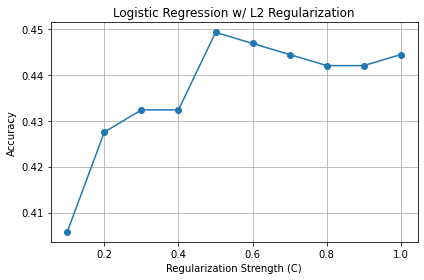

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
ax.set_title('Logistic Regression w/ L2 Regularization')
ax.set_xlabel('Regularization Strength (C)')
ax.set_ylabel('Accuracy')
ax.grid()

ax.plot(Cs, dev_accs, marker='o')

plt.show()

# 2. *Semi-supervised*: Exploring the Unlabeled Data (70 points)

## 2.1. Expanding the Labeled Data

Self-training: iteratively expand the labeled data and retrain the classifier.

Questions:
1. Which labels to include in D_hat in every iteration?
2. When to stop?

## 2.2. Designing Better Features

To deal with the sparsity of the vocabulary, utilize the unlabeled text to learn about the words outside of the training data.

How to represent the word contexts?
- identify related words from co-occurence
- represent words
- compute similarity between word expressions
- encode similar words